In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import (
    precision_score, recall_score, f1_score, balanced_accuracy_score, 
    average_precision_score, roc_auc_score
)

In [17]:
def sklearn_logreg_validation(X_train, y_train, X_valid, y_valid, metrics):
    results = {}
    metric_functions = {
        "precision": precision_score,
        "recall": recall_score,
        "f1": f1_score,
        "balanced_accuracy": balanced_accuracy_score,
        "pr_auc": average_precision_score,
        "roc_auc": roc_auc_score
    }
    
    model = LogisticRegression(
        penalty=None,   
    ).fit(X_train, y_train)

    coefficients = model.coef_[0]  
    for metric_name in metrics:
        metric_func = metric_functions[metric_name]
        
        if metric_name in ["roc_auc", "pr_auc"]:
            y_score = model.predict_proba(X_valid)[:, 1]
            score = metric_func(y_valid, y_score)
        else:
            y_pred = model.predict(X_valid)
            score = metric_func(y_valid, y_pred)
        
        results[metric_name] = score 

    return pd.DataFrame.from_dict(results, orient='index', columns=['Score']), coefficients


In [18]:
import sys
import os

# Add script folder to Python path
script_folder = os.path.abspath("data/scripts")
logReg_folder = os.path.abspath("LogRegCCD")
if script_folder not in sys.path:
    sys.path.insert(0, script_folder)
if logReg_folder not in sys.path:
    sys.path.insert(0, logReg_folder)

# Now import the script (without .py)
import synthetic_dataset
from LogRegCCD_script import LogRegCCD

Dataset saved successfully at: /Users/hania/Desktop/AML_2025/data/scripts/synthetic_dataset_p0.5_n1000_d50_g0.5.csv
Dataset generated successfully with shape: (1000, 51)
======LogRegCCD imlpementation======
Predictions (first 10): [0.50008015 0.50001526 0.50007343 0.49993216 0.49996702 0.50001648
 0.50008229 0.5000177  0.50002347 0.50002857]
Best lambda: 0.14384498882876628, ROC-AUC: 0.7476


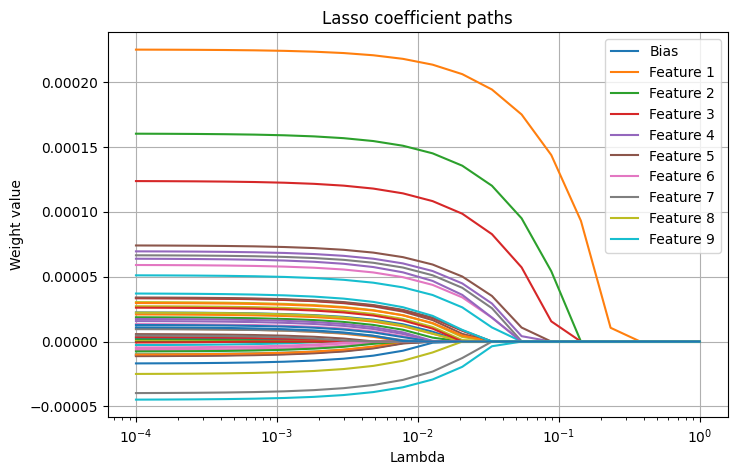

📊 Validation results for different metrics:
                   Best Lambda  Best Score
balanced_accuracy     0.143845    0.678171
roc_auc               0.143845    0.747599
======Sklearn implementation======
📊Performance Metrics:
                       Score
roc_auc            0.736395
balanced_accuracy  0.670468


In [19]:
"""
baseline default configuration
"""
n = 1000
p = 0.5
d = 50
g = 0.5

model = LogRegCCD(
    lambdas=np.logspace(-4, 0, 20), # <--- you can try another np.logspace(...)
    max_iter=1000,
    tol=1e-6
)

dataset = synthetic_dataset.main(p, n, d, g)
X = dataset.drop(columns=['target'])
y = dataset['target'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values


#-------------LogRegCCD imlpementation---------------------
print("======LogRegCCD imlpementation======")
model.fit(X_train, y_train) # Fit model on training data
probs = model.predict_proba(X_test, lmbd=0.1)
print("Predictions (first 10):", probs[:10])
best_lambda, best_score = model.validate(X_test, y_test, metric="roc_auc")
print(f"Best lambda: {best_lambda}, ROC-AUC: {best_score:.4f}")
model.plot_weights()
metrics = ["balanced_accuracy", "roc_auc"]
validation_results = {}
for metric in metrics:
    best_lambda, best_score = model.validate(X_test, y_test, metric=metric)
    validation_results[metric] = {
        "Best Lambda": best_lambda,
        "Best Score": best_score
    }
df_results = pd.DataFrame.from_dict(validation_results, orient="index")
print("📊 Validation results for different metrics:")
print(df_results)
#-------------library implementation-------------------------
results_df, coefficients = sklearn_logreg_validation(X_train, y_train, X_test, y_test, metrics=["roc_auc", "balanced_accuracy"])
print("======Sklearn implementation======")
print("📊Performance Metrics:\n", results_df)



=== Iteration 1/3 ===
Testing class prior p = 0.1 (0.9 negative class)
Dataset saved successfully at: /Users/hania/Desktop/AML_2025/data/scripts/synthetic_dataset_p0.1_n1000_d50_g0.5.csv
Dataset generated successfully with shape: (1000, 51)
======LogRegCCD imlpementation======
Predictions (first 10): [0.49989764 0.49989764 0.49989764 0.49989764 0.49989764 0.49989764
 0.49989764 0.49989764 0.49989764 0.49989764]
Best lambda: 0.0206913808111479, ROC-AUC: 0.7007


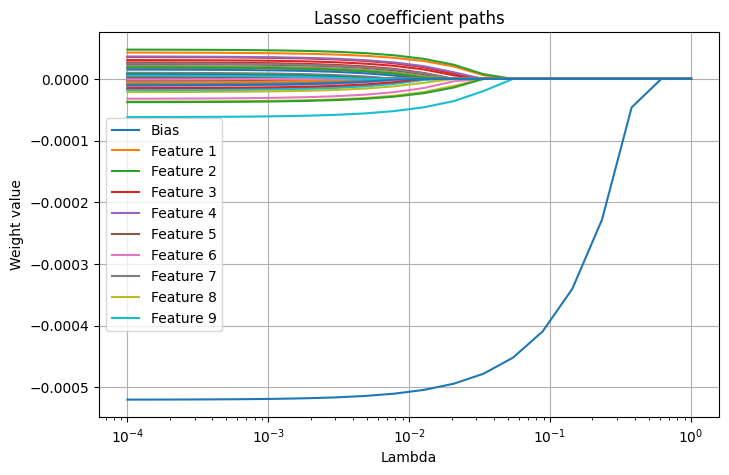

📊 Validation results for different metrics:
                   Best Lambda  Best Score
balanced_accuracy     0.000100    0.500000
roc_auc               0.020691    0.700739
======Sklearn implementation======
📊Performance Metrics:
                       Score
roc_auc            0.787850
balanced_accuracy  0.550627

=== Iteration 2/3 ===
Testing class prior p = 0.5 (0.5 negative class)
Dataset saved successfully at: /Users/hania/Desktop/AML_2025/data/scripts/synthetic_dataset_p0.5_n1000_d50_g0.5.csv
Dataset generated successfully with shape: (1000, 51)
======LogRegCCD imlpementation======
Predictions (first 10): [0.50006947 0.49999336 0.50005485 0.49997384 0.50005076 0.50003359
 0.50001385 0.50002334 0.49999583 0.49996737]
Best lambda: 0.14384498882876628, ROC-AUC: 0.7925


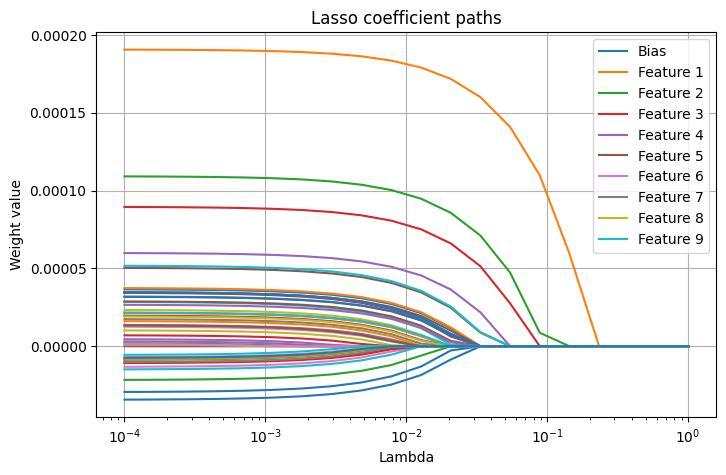

📊 Validation results for different metrics:
                   Best Lambda  Best Score
balanced_accuracy     0.000100    0.701003
roc_auc               0.143845    0.792481
======Sklearn implementation======
📊Performance Metrics:
                       Score
roc_auc            0.727719
balanced_accuracy  0.648622

=== Iteration 3/3 ===
Testing class prior p = 0.9 (0.1 negative class)
Dataset saved successfully at: /Users/hania/Desktop/AML_2025/data/scripts/synthetic_dataset_p0.9_n1000_d50_g0.5.csv
Dataset generated successfully with shape: (1000, 51)
======LogRegCCD imlpementation======
Predictions (first 10): [0.5000917  0.50006164 0.5000848  0.50017571 0.50015103 0.50006936
 0.500174   0.50007587 0.50020683 0.50025545]
Best lambda: 0.23357214690901212, ROC-AUC: 0.7113


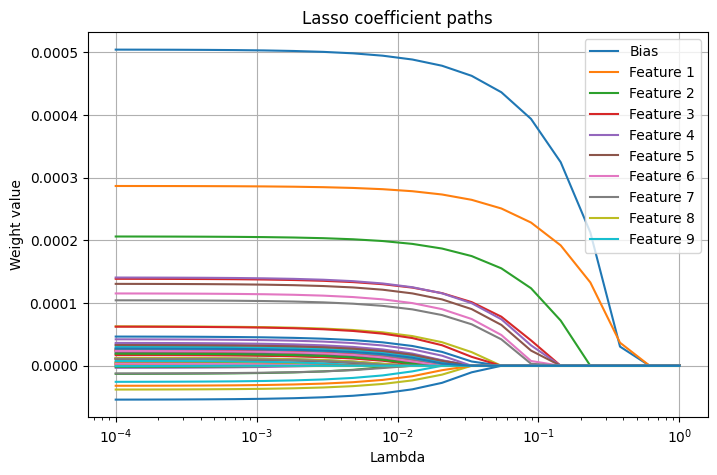

📊 Validation results for different metrics:
                   Best Lambda  Best Score
balanced_accuracy     0.143845    0.552632
roc_auc               0.233572    0.711253
======Sklearn implementation======
📊Performance Metrics:
                       Score
roc_auc            0.699622
balanced_accuracy  0.494475


In [20]:
"""
baseline default configuration
"""
n = 1000
p = 0.5
d = 50
g = 0.5
model = LogRegCCD(
    lambdas=np.logspace(-4, 0, 20), # <--- you can try another np.logspace(...)
    max_iter=1000,
    tol=1e-6
)
#=============================================Varying p parameter=============================================
p_values = [0.1, 0.5, 0.9]
for i, p in enumerate(p_values):
    print(f"\n=== Iteration {i+1}/{len(p_values)} ===")
    print(f"Testing class prior p = {p:.1f} ({(1-p):.1f} negative class)")
    dataset = synthetic_dataset.main(p, n, d, g)
    X = dataset.drop(columns=['target'])
    y = dataset['target'] 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

    X_train = X_train.values
    X_test = X_test.values
    y_train = y_train.values
    y_test = y_test.values

   #-------------LogRegCCD imlpementation---------------------
    print("======LogRegCCD imlpementation======")
    model.fit(X_train, y_train) # Fit model on training data
    probs = model.predict_proba(X_test, lmbd=0.1)
    print("Predictions (first 10):", probs[:10])
    best_lambda, best_score = model.validate(X_test, y_test, metric="roc_auc")
    print(f"Best lambda: {best_lambda}, ROC-AUC: {best_score:.4f}")
    model.plot_weights()
    metrics = ["balanced_accuracy", "roc_auc"]
    validation_results = {}
    for metric in metrics:
        best_lambda, best_score = model.validate(X_test, y_test, metric=metric)
        validation_results[metric] = {
            "Best Lambda": best_lambda,
            "Best Score": best_score
        }
    df_results = pd.DataFrame.from_dict(validation_results, orient="index")
    print("📊 Validation results for different metrics:")
    print(df_results)
    #-------------library implementation-------------------------
    results_df, coefficients = sklearn_logreg_validation(X_train, y_train, X_test, y_test, metrics=["roc_auc", "balanced_accuracy"])
    print("======Sklearn implementation======")
    print("📊Performance Metrics:\n", results_df)
   


=== Iteration 1/8 ===
n = 50.0 
Dataset saved successfully at: /Users/hania/Desktop/AML_2025/data/scripts/synthetic_dataset_p0.5_n50_d50_g0.5.csv
Dataset generated successfully with shape: (50, 51)
======LogRegCCD imlpementation======
Predictions (first 10): [0.50157305 0.50209373 0.49957623 0.49649295 0.50090949 0.50086984
 0.50095799 0.50121255 0.4958874  0.49866813]
Best lambda: 0.0001, ROC-AUC: 0.8750


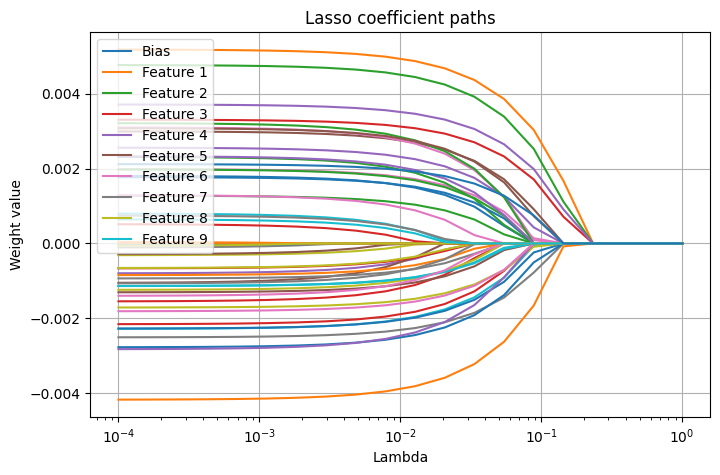

📊 Validation results for different metrics:
                   Best Lambda  Best Score
balanced_accuracy     0.088587    0.791667
roc_auc               0.000100    0.875000
======Sklearn implementation======
📊Performance Metrics:
                    Score
roc_auc            0.625
balanced_accuracy  0.500

=== Iteration 2/8 ===
n = 100.0 
Dataset saved successfully at: /Users/hania/Desktop/AML_2025/data/scripts/synthetic_dataset_p0.5_n100_d50_g0.5.csv
Dataset generated successfully with shape: (100, 51)
======LogRegCCD imlpementation======
Predictions (first 10): [0.50078264 0.50020945 0.50005482 0.50159999 0.50058145 0.49955096
 0.49880321 0.49918727 0.49964137 0.50090408]
Best lambda: 0.23357214690901212, ROC-AUC: 0.7879


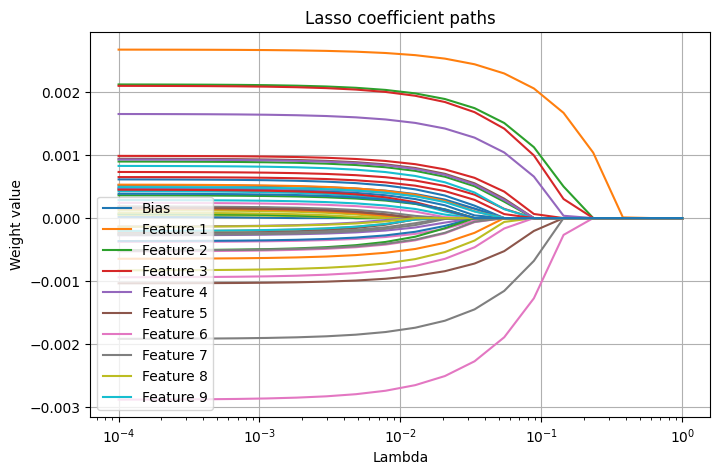

📊 Validation results for different metrics:
                   Best Lambda  Best Score
balanced_accuracy     0.233572    0.676768
roc_auc               0.233572    0.787879
======Sklearn implementation======
📊Performance Metrics:
                       Score
roc_auc            0.606061
balanced_accuracy  0.515152

=== Iteration 3/8 ===
n = 200.0 
Dataset saved successfully at: /Users/hania/Desktop/AML_2025/data/scripts/synthetic_dataset_p0.5_n200_d50_g0.5.csv
Dataset generated successfully with shape: (200, 51)
======LogRegCCD imlpementation======
Predictions (first 10): [0.50005143 0.5000164  0.49997678 0.49981251 0.49996207 0.49991407
 0.5001645  0.50033823 0.50000561 0.49996986]
Best lambda: 0.00026366508987303583, ROC-AUC: 0.7601


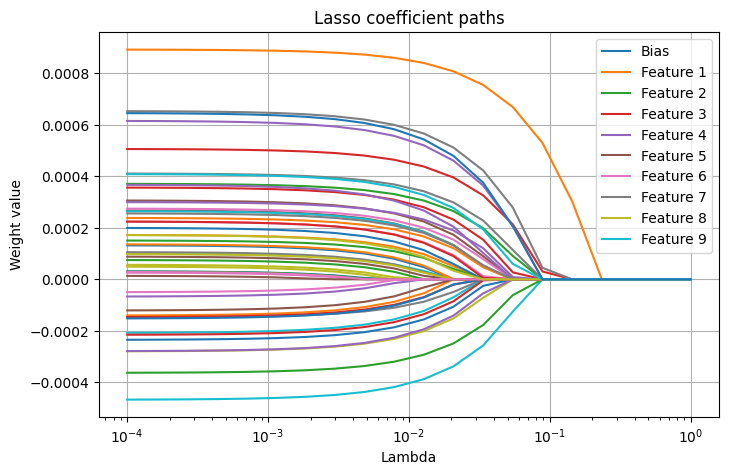

📊 Validation results for different metrics:
                   Best Lambda  Best Score
balanced_accuracy     0.002976    0.712121
roc_auc               0.000264    0.760101
======Sklearn implementation======
📊Performance Metrics:
                       Score
roc_auc            0.641414
balanced_accuracy  0.585859

=== Iteration 4/8 ===
n = 500.0 
Dataset saved successfully at: /Users/hania/Desktop/AML_2025/data/scripts/synthetic_dataset_p0.5_n500_d50_g0.5.csv
Dataset generated successfully with shape: (500, 51)
======LogRegCCD imlpementation======
Predictions (first 10): [0.50007958 0.50010626 0.49993832 0.49992771 0.49991096 0.49991934
 0.5001092  0.49999413 0.50008492 0.49994149]
Best lambda: 0.14384498882876628, ROC-AUC: 0.7013


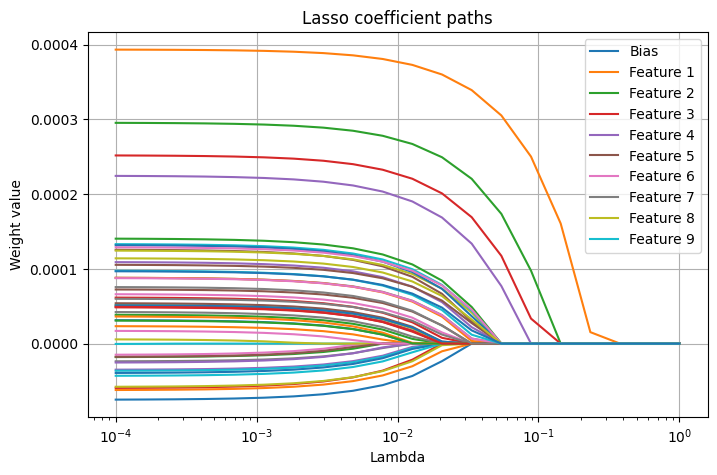

📊 Validation results for different metrics:
                   Best Lambda  Best Score
balanced_accuracy     0.000100    0.645925
roc_auc               0.143845    0.701325
======Sklearn implementation======
📊Performance Metrics:
                       Score
roc_auc            0.711361
balanced_accuracy  0.659976

=== Iteration 5/8 ===
n = 1000.0 
Dataset saved successfully at: /Users/hania/Desktop/AML_2025/data/scripts/synthetic_dataset_p0.5_n1000_d50_g0.5.csv
Dataset generated successfully with shape: (1000, 51)
======LogRegCCD imlpementation======
Predictions (first 10): [0.49997016 0.50000902 0.49998864 0.50001613 0.50001408 0.50006866
 0.50003134 0.49998181 0.50005393 0.50002696]
Best lambda: 0.14384498882876628, ROC-AUC: 0.7285


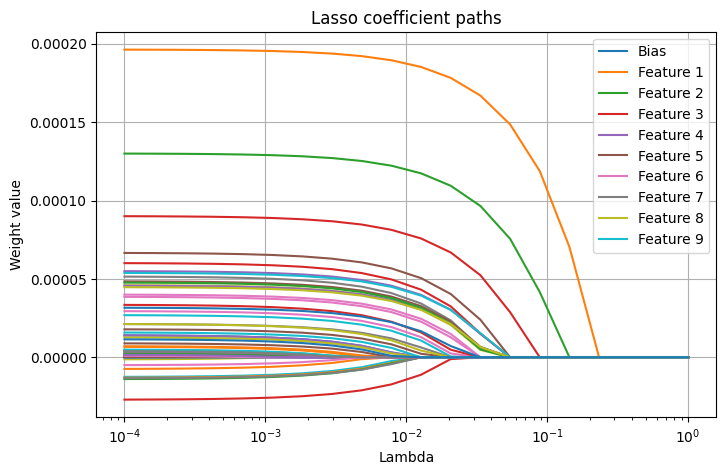

📊 Validation results for different metrics:
                   Best Lambda  Best Score
balanced_accuracy     0.143845      0.6850
roc_auc               0.143845      0.7285
======Sklearn implementation======
📊Performance Metrics:
                     Score
roc_auc            0.6824
balanced_accuracy  0.6150

=== Iteration 6/8 ===
n = 2000.0 
Dataset saved successfully at: /Users/hania/Desktop/AML_2025/data/scripts/synthetic_dataset_p0.5_n2000_d50_g0.5.csv
Dataset generated successfully with shape: (2000, 51)
======LogRegCCD imlpementation======
Predictions (first 10): [0.50003533 0.50000343 0.50006746 0.49996806 0.50002061 0.50003116
 0.50000108 0.50000562 0.50003442 0.50001038]
Best lambda: 0.012742749857031334, ROC-AUC: 0.7584


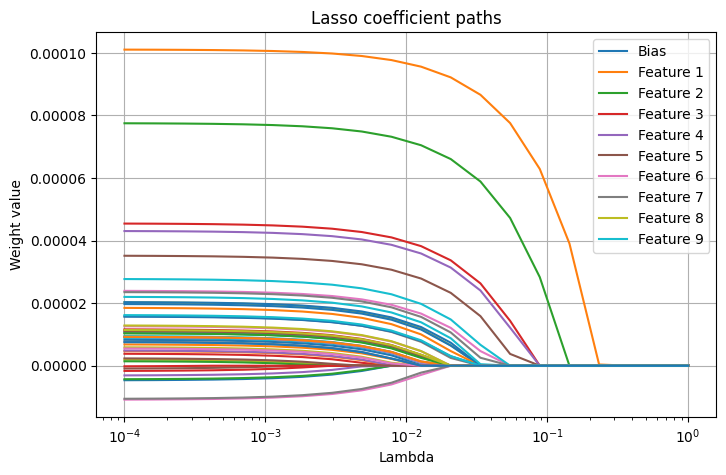

📊 Validation results for different metrics:
                   Best Lambda  Best Score
balanced_accuracy     0.007848    0.701883
roc_auc               0.012743    0.758446
======Sklearn implementation======
📊Performance Metrics:
                       Score
roc_auc            0.742392
balanced_accuracy  0.674777

=== Iteration 7/8 ===
n = 5000.0 
Dataset saved successfully at: /Users/hania/Desktop/AML_2025/data/scripts/synthetic_dataset_p0.5_n5000_d50_g0.5.csv
Dataset generated successfully with shape: (5000, 51)
======LogRegCCD imlpementation======
Predictions (first 10): [0.50000141 0.50000452 0.50000209 0.50001712 0.50000495 0.50000344
 0.50000678 0.5000168  0.50001024 0.49999661]
Best lambda: 0.14384498882876628, ROC-AUC: 0.7769


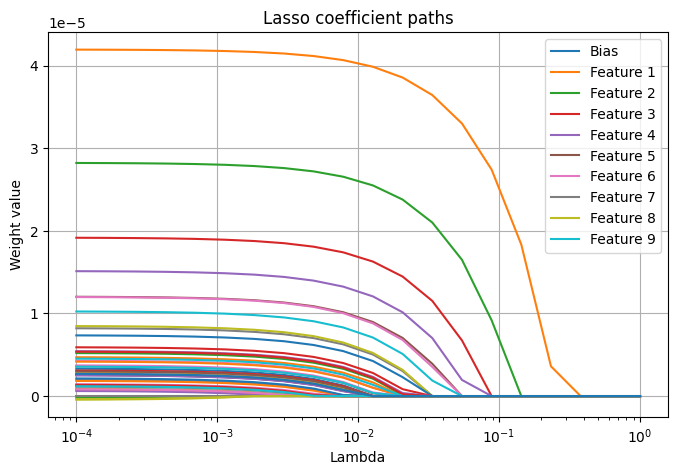

📊 Validation results for different metrics:
                   Best Lambda  Best Score
balanced_accuracy     0.088587    0.675418
roc_auc               0.143845    0.776922
======Sklearn implementation======
📊Performance Metrics:
                       Score
roc_auc            0.777026
balanced_accuracy  0.704210

=== Iteration 8/8 ===
n = 10000.0 
Dataset saved successfully at: /Users/hania/Desktop/AML_2025/data/scripts/synthetic_dataset_p0.5_n10000_d50_g0.5.csv
Dataset generated successfully with shape: (10000, 51)
======LogRegCCD imlpementation======
Predictions (first 10): [0.49999748 0.49999923 0.50000279 0.49999946 0.50000113 0.50000203
 0.50000136 0.50000342 0.50000054 0.49999807]
Best lambda: 0.14384498882876628, ROC-AUC: 0.7696


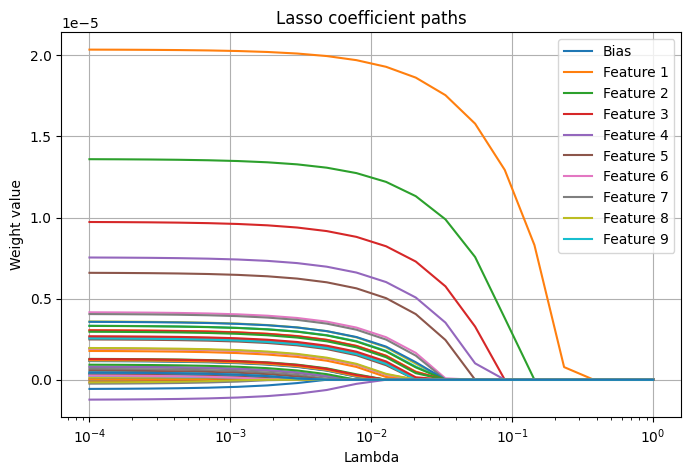

📊 Validation results for different metrics:
                   Best Lambda  Best Score
balanced_accuracy     0.143845    0.678080
roc_auc               0.143845    0.769588
======Sklearn implementation======
📊Performance Metrics:
                       Score
roc_auc            0.776042
balanced_accuracy  0.707904


In [24]:
"""
baseline default configuration
"""
n = 1000
p = 0.5
d = 50
g = 0.5
model = LogRegCCD(
    lambdas=np.logspace(-4, 0, 20), # <--- you can try another np.logspace(...)
    max_iter=1000,
    tol=1e-6
)
#=============================================Varying n parameter=============================================
n_values = [50, 100, 200, 500, 1000, 2000, 5000, 10000]
for i, n in enumerate(n_values):
    print(f"\n=== Iteration {i+1}/{len(n_values)} ===")
    print(f"n = {n:.1f} ")
    dataset = synthetic_dataset.main(p, n, d, g)
    X = dataset.drop(columns=['target'])
    y = dataset['target'] 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

    X_train = X_train.values
    X_test = X_test.values
    y_train = y_train.values
    y_test = y_test.values

    #-------------LogRegCCD imlpementation---------------------
    print("======LogRegCCD imlpementation======")
    model.fit(X_train, y_train) # Fit model on training data
    probs = model.predict_proba(X_test, lmbd=0.1)
    print("Predictions (first 10):", probs[:10])
    best_lambda, best_score = model.validate(X_test, y_test, metric="roc_auc")
    print(f"Best lambda: {best_lambda}, ROC-AUC: {best_score:.4f}")
    model.plot_weights()
    metrics = ["balanced_accuracy", "roc_auc"]
    validation_results = {}
    for metric in metrics:
        best_lambda, best_score = model.validate(X_test, y_test, metric=metric)
        validation_results[metric] = {
            "Best Lambda": best_lambda,
            "Best Score": best_score
        }
    df_results = pd.DataFrame.from_dict(validation_results, orient="index")
    print("📊 Validation results for different metrics:")
    print(df_results)
    #-------------library implementation-------------------------
    results_df, coefficients = sklearn_logreg_validation(X_train, y_train, X_test, y_test, metrics=["roc_auc", "balanced_accuracy"])
    print("======Sklearn implementation======")
    print("📊Performance Metrics:\n", results_df)


=== Iteration 1/6 ===
d = 10.0 
Dataset saved successfully at: /Users/hania/Desktop/AML_2025/data/scripts/synthetic_dataset_p0.5_n1000_d10_g0.5.csv
Dataset generated successfully with shape: (1000, 11)
======LogRegCCD imlpementation======
Predictions (first 10): [0.5000571  0.50001237 0.49997388 0.49999444 0.50004211 0.50004636
 0.50003155 0.4999994  0.50002283 0.50007436]
Best lambda: 0.08858667904100823, ROC-AUC: 0.8319


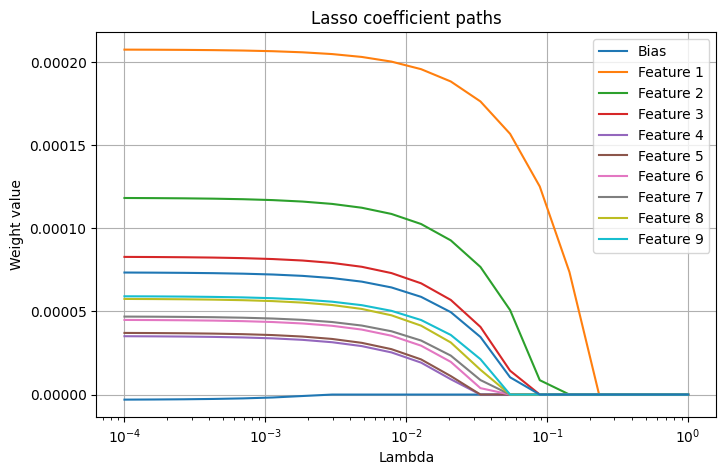

📊 Validation results for different metrics:
                   Best Lambda  Best Score
balanced_accuracy     0.088587    0.741874
roc_auc               0.088587    0.831883
======Sklearn implementation======
📊Performance Metrics:
                       Score
roc_auc            0.819182
balanced_accuracy  0.734923

=== Iteration 2/6 ===
d = 20.0 
Dataset saved successfully at: /Users/hania/Desktop/AML_2025/data/scripts/synthetic_dataset_p0.5_n1000_d20_g0.5.csv
Dataset generated successfully with shape: (1000, 21)
======LogRegCCD imlpementation======
Predictions (first 10): [0.49998336 0.50002668 0.50008007 0.49991483 0.5000822  0.50006248
 0.49996863 0.50001985 0.50002912 0.50000462]
Best lambda: 0.03359818286283781, ROC-AUC: 0.8048


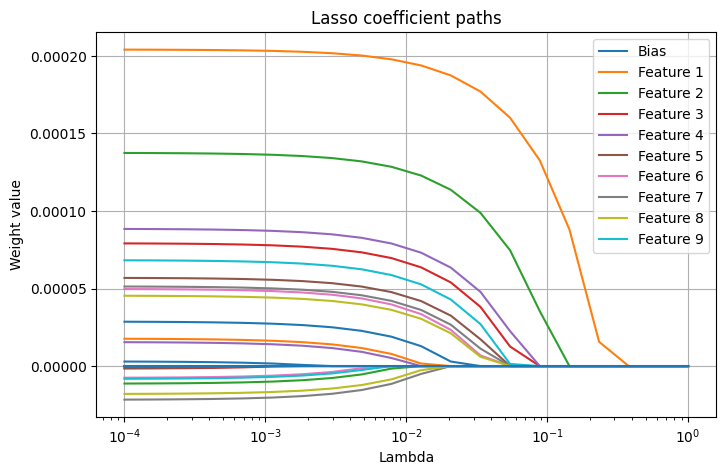

📊 Validation results for different metrics:
                   Best Lambda  Best Score
balanced_accuracy     0.088587      0.7000
roc_auc               0.033598      0.8048
======Sklearn implementation======
📊Performance Metrics:
                    Score
roc_auc            0.777
balanced_accuracy  0.710

=== Iteration 3/6 ===
d = 50.0 
Dataset saved successfully at: /Users/hania/Desktop/AML_2025/data/scripts/synthetic_dataset_p0.5_n1000_d50_g0.5.csv
Dataset generated successfully with shape: (1000, 51)
======LogRegCCD imlpementation======
Predictions (first 10): [0.50011609 0.49996969 0.50006164 0.5000408  0.50008528 0.50005718
 0.50008562 0.50001472 0.49997946 0.5000645 ]
Best lambda: 0.14384498882876628, ROC-AUC: 0.7989


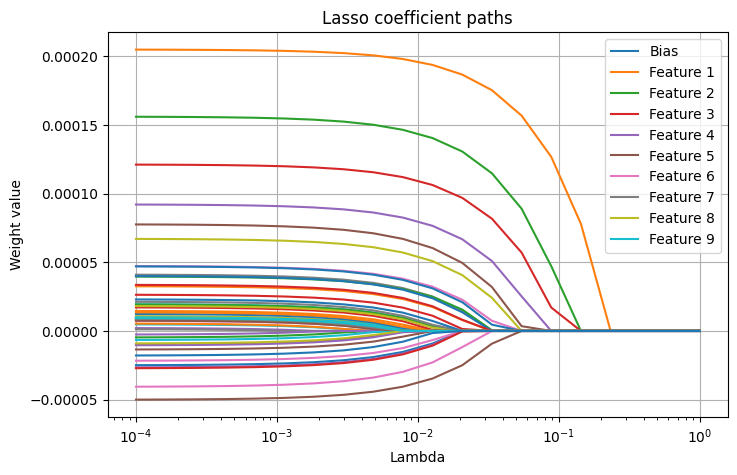

📊 Validation results for different metrics:
                   Best Lambda  Best Score
balanced_accuracy     0.004833    0.699920
roc_auc               0.143845    0.798878
======Sklearn implementation======
📊Performance Metrics:
                       Score
roc_auc            0.813702
balanced_accuracy  0.733974

=== Iteration 4/6 ===
d = 100.0 
Dataset saved successfully at: /Users/hania/Desktop/AML_2025/data/scripts/synthetic_dataset_p0.5_n1000_d100_g0.5.csv
Dataset generated successfully with shape: (1000, 101)
======LogRegCCD imlpementation======
Predictions (first 10): [0.50009334 0.49997513 0.50003601 0.50001021 0.50009159 0.50005297
 0.50005286 0.50002094 0.49993452 0.5000194 ]
Best lambda: 0.23357214690901212, ROC-AUC: 0.8001


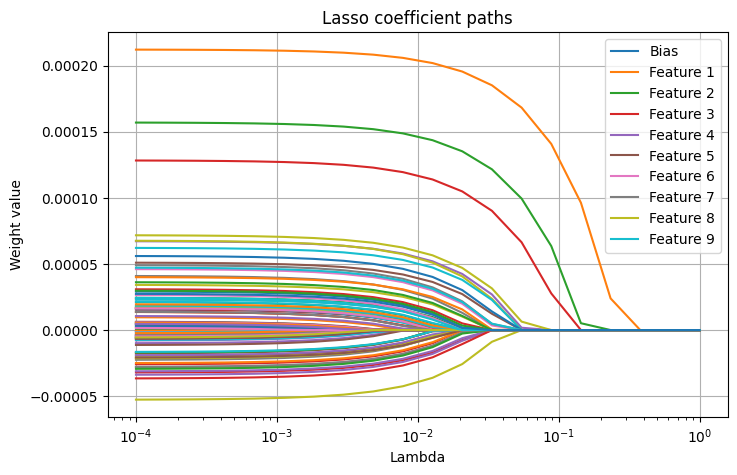

📊 Validation results for different metrics:
                   Best Lambda  Best Score
balanced_accuracy     0.033598    0.707337
roc_auc               0.233572    0.800120
======Sklearn implementation======
📊Performance Metrics:
                       Score
roc_auc            0.744470
balanced_accuracy  0.640577

=== Iteration 5/6 ===
d = 200.0 
Dataset saved successfully at: /Users/hania/Desktop/AML_2025/data/scripts/synthetic_dataset_p0.5_n1000_d200_g0.5.csv
Dataset generated successfully with shape: (1000, 201)
======LogRegCCD imlpementation======
Predictions (first 10): [0.50014615 0.49995968 0.4999921  0.49994961 0.49999607 0.50001045
 0.5000475  0.50005554 0.49997661 0.49998077]
Best lambda: 0.14384498882876628, ROC-AUC: 0.7549


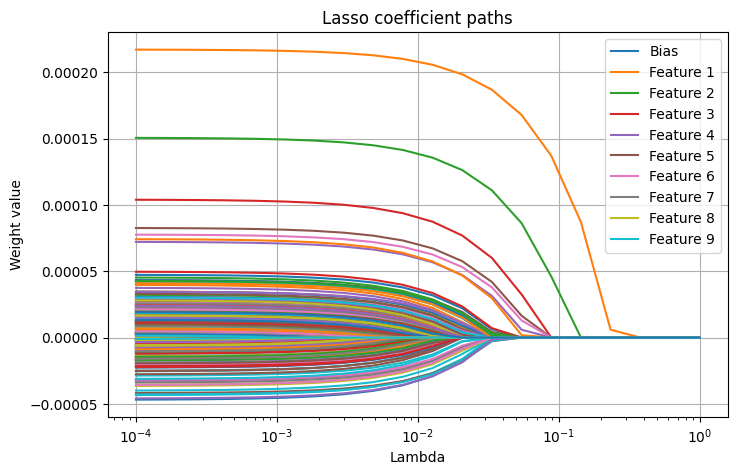

📊 Validation results for different metrics:
                   Best Lambda  Best Score
balanced_accuracy     0.033598    0.662465
roc_auc               0.143845    0.754902
======Sklearn implementation======
📊Performance Metrics:
                       Score
roc_auc            0.703581
balanced_accuracy  0.654562

=== Iteration 6/6 ===
d = 500.0 
Dataset saved successfully at: /Users/hania/Desktop/AML_2025/data/scripts/synthetic_dataset_p0.5_n1000_d500_g0.5.csv
Dataset generated successfully with shape: (1000, 501)
======LogRegCCD imlpementation======
Predictions (first 10): [0.50003411 0.49999027 0.50008229 0.49995796 0.50007776 0.50010862
 0.50005678 0.50001901 0.49999657 0.49998936]
Best lambda: 0.08858667904100823, ROC-AUC: 0.7969


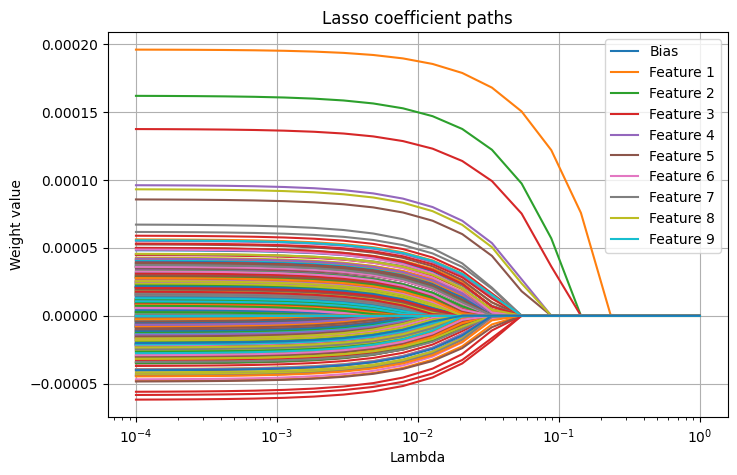

📊 Validation results for different metrics:
                   Best Lambda  Best Score
balanced_accuracy     0.088587    0.707983
roc_auc               0.088587    0.796919
======Sklearn implementation======
📊Performance Metrics:
                       Score
roc_auc            0.650510
balanced_accuracy  0.609844


In [25]:

"""
baseline default configuration
"""
n = 1000
p = 0.5
d = 50
g = 0.5
model = LogRegCCD(
    lambdas=np.logspace(-4, 0, 20), # <--- you can try another np.logspace(...)
    max_iter=1000,
    tol=1e-6
)
#=============================================Varying d parameter=============================================
d_values = [10, 20, 50, 100, 200, 500] 
for i, d in enumerate(d_values):
    print(f"\n=== Iteration {i+1}/{len(d_values)} ===")
    print(f"d = {d:.1f} ")
    dataset = synthetic_dataset.main(p, n, d, g)
    X = dataset.drop(columns=['target'])
    y = dataset['target'] 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

    X_train = X_train.values
    X_test = X_test.values
    y_train = y_train.values
    y_test = y_test.values

   #-------------LogRegCCD imlpementation---------------------
    print("======LogRegCCD imlpementation======")
    model.fit(X_train, y_train) # Fit model on training data
    probs = model.predict_proba(X_test, lmbd=0.1)
    print("Predictions (first 10):", probs[:10])
    best_lambda, best_score = model.validate(X_test, y_test, metric="roc_auc")
    print(f"Best lambda: {best_lambda}, ROC-AUC: {best_score:.4f}")
    model.plot_weights()
    metrics = ["balanced_accuracy", "roc_auc"]
    validation_results = {}
    for metric in metrics:
        best_lambda, best_score = model.validate(X_test, y_test, metric=metric)
        validation_results[metric] = {
            "Best Lambda": best_lambda,
            "Best Score": best_score
        }
    df_results = pd.DataFrame.from_dict(validation_results, orient="index")
    print("📊 Validation results for different metrics:")
    print(df_results)
    #-------------library implementation-------------------------
    results_df, coefficients = sklearn_logreg_validation(X_train, y_train, X_test, y_test, metrics=["roc_auc", "balanced_accuracy"])
    print("======Sklearn implementation======")
    print("📊Performance Metrics:\n", results_df)
   


=== Iteration 1/3 ===
d = 0.1 
Dataset saved successfully at: /Users/hania/Desktop/AML_2025/data/scripts/synthetic_dataset_p0.5_n1000_d50_g0.1.csv
Dataset generated successfully with shape: (1000, 51)
======LogRegCCD imlpementation======
Predictions (first 10): [0.50004867 0.50003299 0.50000686 0.50000047 0.49999795 0.50006824
 0.50004657 0.50001945 0.49997282 0.49997723]
Best lambda: 0.012742749857031334, ROC-AUC: 0.8246


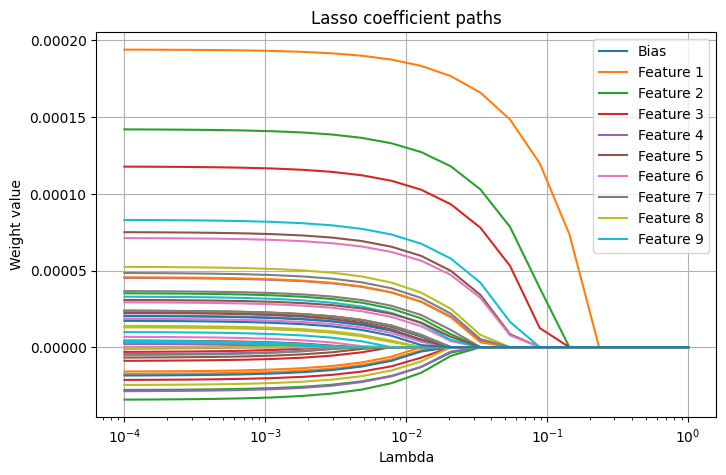

📊 Validation results for different metrics:
                   Best Lambda  Best Score
balanced_accuracy     0.088587      0.6900
roc_auc               0.012743      0.8246
======Sklearn implementation======
📊Performance Metrics:
                     Score
roc_auc            0.8099
balanced_accuracy  0.7100

=== Iteration 2/3 ===
d = 0.5 
Dataset saved successfully at: /Users/hania/Desktop/AML_2025/data/scripts/synthetic_dataset_p0.5_n1000_d50_g0.5.csv
Dataset generated successfully with shape: (1000, 51)
======LogRegCCD imlpementation======
Predictions (first 10): [0.50005995 0.50000235 0.50003348 0.50001729 0.5000333  0.50004891
 0.50010556 0.50003155 0.50002037 0.50004854]
Best lambda: 0.14384498882876628, ROC-AUC: 0.7152


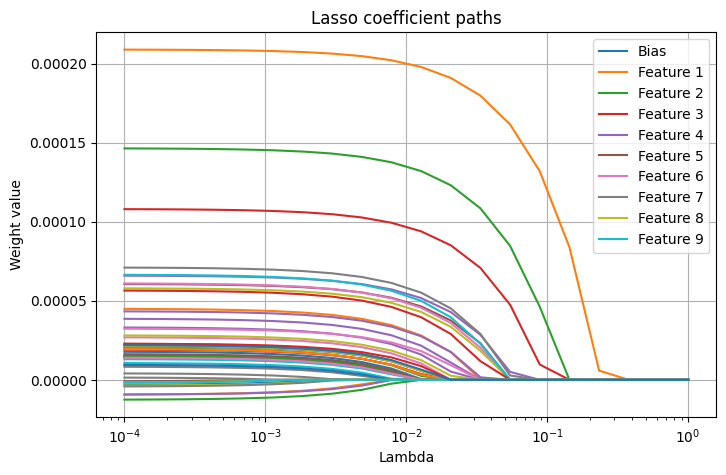

📊 Validation results for different metrics:
                   Best Lambda  Best Score
balanced_accuracy     0.033598    0.656616
roc_auc               0.143845    0.715172
======Sklearn implementation======
📊Performance Metrics:
                       Score
roc_auc            0.715672
balanced_accuracy  0.649765

=== Iteration 3/3 ===
d = 0.9 
Dataset saved successfully at: /Users/hania/Desktop/AML_2025/data/scripts/synthetic_dataset_p0.5_n1000_d50_g0.9.csv
Dataset generated successfully with shape: (1000, 51)
======LogRegCCD imlpementation======
Predictions (first 10): [0.50018032 0.50000448 0.50003522 0.49989727 0.50017605 0.49993043
 0.50009593 0.50006571 0.50007429 0.50007464]
Best lambda: 0.23357214690901212, ROC-AUC: 0.7561


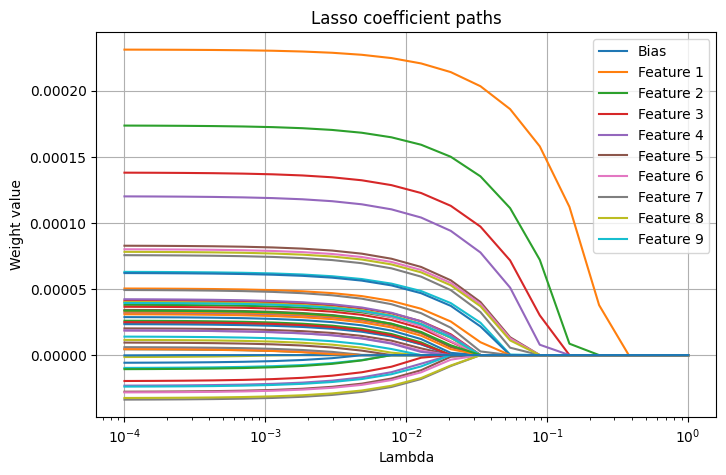

📊 Validation results for different metrics:
                   Best Lambda  Best Score
balanced_accuracy     0.143845    0.633113
roc_auc               0.233572    0.756076
======Sklearn implementation======
📊Performance Metrics:
                       Score
roc_auc            0.803780
balanced_accuracy  0.729873


In [ ]:
"""
baseline default configuration
"""
n = 1000
p = 0.5
d = 50
g = 0.5
model = LogRegCCD(
    lambdas=np.logspace(-4, 0, 20), # <--- you can try another np.logspace(...)
    max_iter=1000,
    tol=1e-6
)
#=============================================Varying g parameter=============================================
g_values = [0.1, 0.5, 0.9]
for i, g in enumerate(g_values):
    print(f"\n=== Iteration {i+1}/{len(g_values)} ===")
    print(f"d = {g:.1f} ")
    dataset = synthetic_dataset.main(p, n, d, g)
    X = dataset.drop(columns=['target'])
    y = dataset['target'] 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

    X_train = X_train.values
    X_test = X_test.values
    y_train = y_train.values
    y_test = y_test.values

   #-------------LogRegCCD imlpementation---------------------
    print("======LogRegCCD imlpementation======")
    model.fit(X_train, y_train) # Fit model on training data
    probs = model.predict_proba(X_test, lmbd=0.1)
    print("Predictions (first 10):", probs[:10])
    best_lambda, best_score = model.validate(X_test, y_test, metric="roc_auc")
    print(f"Best lambda: {best_lambda}, ROC-AUC: {best_score:.4f}")
    model.plot_weights()
    metrics = ["balanced_accuracy", "roc_auc"]
    validation_results = {}
    for metric in metrics:
        best_lambda, best_score = model.validate(X_test, y_test, metric=metric)
        validation_results[metric] = {
            "Best Lambda": best_lambda,
            "Best Score": best_score
        }
    df_results = pd.DataFrame.from_dict(validation_results, orient="index")
    print("📊 Validation results for different metrics:")
    print(df_results)
    #-------------library implementation-------------------------
    results_df, coefficients = sklearn_logreg_validation(X_train, y_train, X_test, y_test, metrics=["roc_auc", "balanced_accuracy"])
    print("======Sklearn implementation======")
    print("📊Performance Metrics:\n", results_df)
   